In [37]:
!pip install -q scikit-learn pandas numpy matplotlib seaborn joblib


In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

import joblib


In [39]:
from google.colab import files
uploaded = files.upload()


Saving Obesity.csv to Obesity (2).csv


In [40]:
df = pd.read_csv("Obesity.csv")

df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [42]:
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


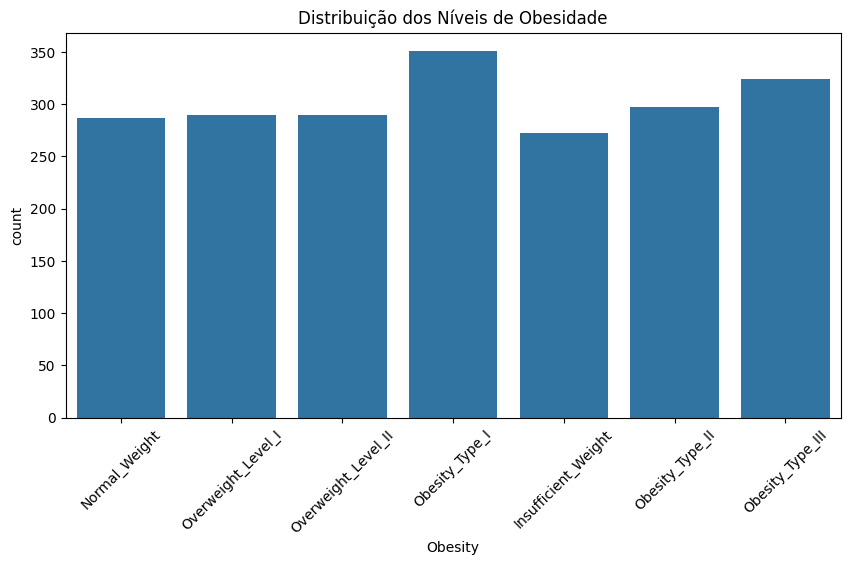

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Obesity")
plt.xticks(rotation=45)
plt.title("Distribuição dos Níveis de Obesidade")
plt.show()


In [44]:
X = df.drop("Obesity", axis=1)
y = df["Obesity"]


Variáveis Categóricas: ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Variáveis Numéricas: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

RANDOM FOREST
Acurácia: 93.14%
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.76      0.90      0.83        58
     Obesity_Type_I       0.94      0.96      0.95        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.88      0.84      0.86        58
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.93       423
          macro avg       0.94      0.93      0.93       423
       weighted avg       0.94      0.93      0.93       423



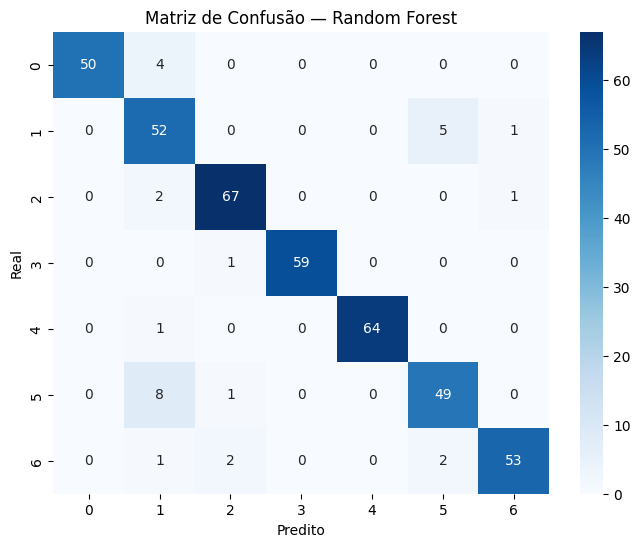

In [45]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

print("Variáveis Categóricas:", list(cat_features))
print("Variáveis Numéricas:", list(num_features))

# =====================================================
# PRÉ-PROCESSAMENTO
# =====================================================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

# =====================================================
# MODELOS
# =====================================================
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

log_model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    class_weight="balanced",
    random_state=42
)

# =====================================================
# PIPELINES
# =====================================================
pipeline_rf = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", rf_model)
    ]
)

pipeline_log = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", log_model)
    ]
)

# =====================================================
# SPLIT TREINO / TESTE
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# =====================================================
# TREINAMENTO
# =====================================================
pipeline_rf.fit(X_train, y_train)
pipeline_log.fit(X_train, y_train)

# =====================================================
# PREDIÇÕES
# =====================================================
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_log = pipeline_log.predict(X_test)

# =====================================================
# MÉTRICAS RANDOM FOREST
# =====================================================
print("\n==============================")
print("RANDOM FOREST")
print("==============================")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.2%}")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão — Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()



REGRESSÃO LOGÍSTICA
Acurácia: 87.00%
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        54
      Normal_Weight       0.81      0.76      0.79        58
     Obesity_Type_I       0.88      0.87      0.88        70
    Obesity_Type_II       0.91      0.97      0.94        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.72      0.74      0.73        58
Overweight_Level_II       0.81      0.76      0.79        58

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.87      0.87      0.87       423



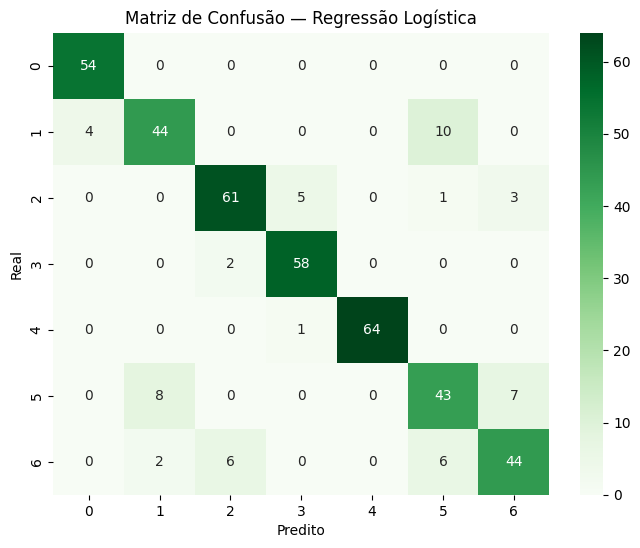

In [46]:
# =====================================================
# MÉTRICAS REGRESSÃO LOGÍSTICA
# =====================================================
print("\n==============================")
print("REGRESSÃO LOGÍSTICA")
print("==============================")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log):.2%}")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão — Regressão Logística")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# =====================================================
# COMPARAÇÃO FINAL
# =====================================================
comparacao = pd.DataFrame({
    "Modelo": ["Random Forest", "Regressão Logística"],
    "Acurácia": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_log)
    ],
    "Precisão": [
        precision_score(y_test, y_pred_rf, average="weighted"),
        precision_score(y_test, y_pred_log, average="weighted")
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf, average="weighted"),
        recall_score(y_test, y_pred_log, average="weighted")
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_rf, average="weighted"),
        f1_score(y_test, y_pred_log, average="weighted")
    ]
})

In [47]:
feature_names = (
    pipeline.named_steps["preprocessing"]
    .transformers_[1][1]
    .get_feature_names_out(cat_features)
)

all_features = np.concatenate([num_features, feature_names])

importances = pipeline.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)


,Feature,Importance
2,Weight,0.278230
0,Age,0.094748
1,Height,0.083474
3,FCVC,0.075336
4,NCP,0.051938
6,FAF,0.047427
5,CH2O,0.045067
7,TUE,0.043373
8,Gender_Female,0.034071
9,Gender_Male,0.033906


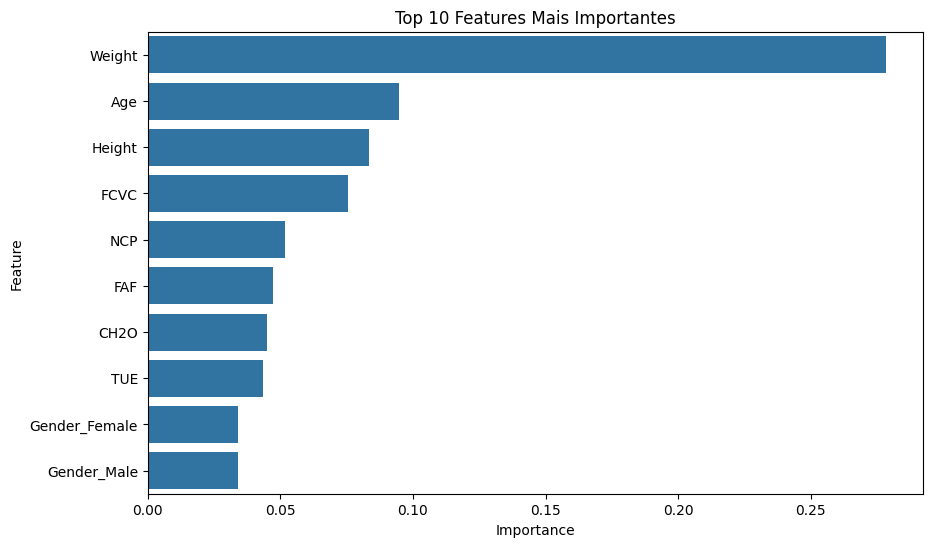

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=feat_imp.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Features Mais Importantes")
plt.show()


In [49]:
joblib.dump(pipeline, "model_obesity.pkl")


['model_obesity.pkl']

In [50]:
files.download("model_obesity.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
# Previsão para todo o dataset
df["Obesity_pred"] = pipeline.predict(X)

# Probabilidade máxima da previsão
probas = pipeline.predict_proba(X)
df["Probabilidade"] = probas.max(axis=1)

# Flag de erro
df["Erro_Predicao"] = np.where(
    df["Obesity"] == df["Obesity_pred"], "Não", "Sim"
)

df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Obesity_pred,Probabilidade,Erro_Predicao
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,Normal_Weight,0.690000,Não
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Normal_Weight,0.803333,Não
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,Normal_Weight,0.820000,Não
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,Overweight_Level_I,0.773333,Não
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Overweight_Level_II,0.860000,Não


In [52]:
df["IMC"] = df["Weight"] / (df["Height"] ** 2)


In [53]:
df["Faixa_Etaria"] = pd.cut(
    df["Age"],
    bins=[0, 18, 30, 45, 60, 100],
    labels=["Adolescente", "Jovem Adulto", "Adulto", "Meia Idade", "Idoso"]
)


In [54]:
df["Nivel_Risco"] = df["Obesity_pred"].apply(
    lambda x: "Alto" if "Obesity" in x else "Moderado"
)


In [55]:
performance = (
    df.groupby("Obesity")
    .agg(
        Total=("Obesity", "count"),
        Acertos=("Erro_Predicao", lambda x: (x == "Não").sum())
    )
    .reset_index()
)

performance["Acuracia"] = performance["Acertos"] / performance["Total"]

performance


,Obesity,Total,Acertos,Acuracia
0,Insufficient_Weight,272,268,0.985294
1,Normal_Weight,287,281,0.979094
2,Obesity_Type_I,351,348,0.991453
3,Obesity_Type_II,297,296,0.996633
4,Obesity_Type_III,324,323,0.996914
5,Overweight_Level_I,290,281,0.968966
6,Overweight_Level_II,290,285,0.982759


In [56]:
colunas_pt = {
    "Gender": "Genero",
    "Age": "Idade",
    "Height": "Altura_m",
    "Weight": "Peso_kg",
    "family_history": "Historico_Familiar_Obesidade",
    "FAVC": "Consumo_Alimentos_Caloricos",
    "FCVC": "Consumo_Vegetais",
    "NCP": "Refeicoes_Diarias",
    "CAEC": "Lanches_Entre_Refeicoes",
    "SMOKE": "Fumante",
    "CH2O": "Consumo_Agua",
    "SCC": "Monitora_Calorias",
    "FAF": "Atividade_Fisica",
    "TUE": "Tempo_Dispositivos",
    "CALC": "Consumo_Alcool",
    "MTRANS": "Meio_Transporte",
    "Obesity": "Nivel_Obesidade",
    "Obesity_pred": "Nivel_Obesidade_Previsto",
    "Probabilidade": "Probabilidade_Modelo",
    "Erro_Predicao": "Erro_Predicao"
}

df_pt = df.rename(columns=colunas_pt)


In [57]:
df_pt["Genero"] = df_pt["Genero"].replace({
    "Male": "Masculino",
    "Female": "Feminino"
})


In [58]:
sim_nao = {
    "yes": "Sim",
    "no": "Não"
}

colunas_sim_nao = [
    "Historico_Familiar_Obesidade",
    "Consumo_Alimentos_Caloricos",
    "Fumante",
    "Monitora_Calorias"
]

for col in colunas_sim_nao:
    df_pt[col] = df_pt[col].replace(sim_nao)


In [59]:
traducao_obesidade = {
    "Insufficient_Weight": "Abaixo do Peso",
    "Normal_Weight": "Peso Normal",
    "Overweight_Level_I": "Sobrepeso I",
    "Overweight_Level_II": "Sobrepeso II",
    "Obesity_Type_I": "Obesidade Grau I",
    "Obesity_Type_II": "Obesidade Grau II",
    "Obesity_Type_III": "Obesidade Grau III"
}

df_pt["Nivel_Obesidade"] = df_pt["Nivel_Obesidade"].replace(traducao_obesidade)
df_pt["Nivel_Obesidade_Previsto"] = df_pt["Nivel_Obesidade_Previsto"].replace(traducao_obesidade)


In [60]:
atividade_fisica = {
    0: "Nenhuma",
    1: "1–2x por semana",
    2: "3–4x por semana",
    3: "5x ou mais"
}

df_pt["Atividade_Fisica"] = df_pt["Atividade_Fisica"].round().map(atividade_fisica)


In [61]:
df_pt.head()
df_pt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Genero                        2111 non-null   object  
 1   Idade                         2111 non-null   float64 
 2   Altura_m                      2111 non-null   float64 
 3   Peso_kg                       2111 non-null   float64 
 4   Historico_Familiar_Obesidade  2111 non-null   object  
 5   Consumo_Alimentos_Caloricos   2111 non-null   object  
 6   Consumo_Vegetais              2111 non-null   float64 
 7   Refeicoes_Diarias             2111 non-null   float64 
 8   Lanches_Entre_Refeicoes       2111 non-null   object  
 9   Fumante                       2111 non-null   object  
 10  Consumo_Agua                  2111 non-null   float64 
 11  Monitora_Calorias             2111 non-null   object  
 12  Atividade_Fisica              2111 non-null   ob

In [62]:
df_pt.head()

,Genero,Idade,Altura_m,Peso_kg,Historico_Familiar_Obesidade,Consumo_Alimentos_Caloricos,Consumo_Vegetais,Refeicoes_Diarias,Lanches_Entre_Refeicoes,Fumante,...,Tempo_Dispositivos,Consumo_Alcool,Meio_Transporte,Nivel_Obesidade,Nivel_Obesidade_Previsto,Probabilidade_Modelo,Erro_Predicao,IMC,Faixa_Etaria,Nivel_Risco
0,Feminino,21.0,1.62,64.0,Sim,Não,2.0,3.0,Sometimes,Não,...,1.0,no,Public_Transportation,Peso Normal,Peso Normal,0.690000,Não,24.386526,Jovem Adulto,Moderado
1,Feminino,21.0,1.52,56.0,Sim,Não,3.0,3.0,Sometimes,Sim,...,0.0,Sometimes,Public_Transportation,Peso Normal,Peso Normal,0.803333,Não,24.238227,Jovem Adulto,Moderado
2,Masculino,23.0,1.80,77.0,Sim,Não,2.0,3.0,Sometimes,Não,...,1.0,Frequently,Public_Transportation,Peso Normal,Peso Normal,0.820000,Não,23.765432,Jovem Adulto,Moderado
3,Masculino,27.0,1.80,87.0,Não,Não,3.0,3.0,Sometimes,Não,...,0.0,Frequently,Walking,Sobrepeso I,Sobrepeso I,0.773333,Não,26.851852,Jovem Adulto,Moderado
4,Masculino,22.0,1.78,89.8,Não,Não,2.0,1.0,Sometimes,Não,...,0.0,Sometimes,Public_Transportation,Sobrepeso II,Sobrepeso II,0.860000,Não,28.342381,Jovem Adulto,Moderado


In [63]:
df_pt.to_csv("obesidade_analiticoBI_ptbr.csv", index=False)



In [64]:
from google.colab import files
files.download("obesidade_analiticoBI_ptbr.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
from google.colab import files

# Salvar o pipeline treinado
joblib.dump(pipeline, "risco_obesidade_random_forest.joblib")

print("Modelo salvo com sucesso!")

# Download para sua máquina
files.download("risco_obesidade_random_forest.joblib")


Modelo salvo com sucesso!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>